In [2]:
import os

from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import xarray as xr

from tqdm import tqdm

# グラフの色指定
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
markers = ["o", "^", "s", "D", "P", "X", "d", "H", "v", "p", "*"]
linestyles = ["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"]

# グラフ全体のフォント設定
# plt.rcParams['font.family'] = 'serif'  # 全体のフォントをSerifに設定
# plt.rcParams['mathtext.fontset'] = 'cm'  # 数式のフォントをComputer Modernに設定
# plt.rcParams['mathtext.rm'] = 'serif'  # TeXの通常フォントをSerifに設定
# plt.rcParams['font.size'] = 18  # デフォルトフォントサイズ
# plt.rcParams['axes.labelsize'] = 18  # 軸ラベルのフォントサイズ
# plt.rcParams['axes.titlesize'] = 22  # タイトルのフォントサイズ
# plt.rcParams['legend.fontsize'] = 16  # 凡例のフォントサイズ
# plt.rcParams['grid.color'] = 'gray'  # グリッドの色を薄い灰色に設定
# plt.rcParams['grid.linestyle'] = ':'  # グリッドを点線に設定
# plt.rcParams['grid.linewidth'] = 0.5  # グリッドの線幅を設定

In [37]:
kOutMin = 5
kOutMax = 223
n = 50_000
gamma = 2.5

output_dir = os.path.abspath(os.path.join("..", "app", "out", "edgelist"))
output_dir = os.path.join(output_dir, f"n={n}", f"gamma={gamma:.2f}", f"kOutMin={kOutMin}", f"kOutMax={kOutMax}")


G = nx.read_edgelist(os.path.join(output_dir, "DirectedCMOutPow_5.txt"), create_using=nx.DiGraph(), nodetype=int)
print(G.number_of_nodes())
print(G.number_of_edges())


50000
582524


In [38]:
dict(G.in_degree())
dict(G.out_degree())
C = max(list(nx.strongly_connected_components(G)), key=len)
print(len(C))

50000


/var/folders/vv/tq6tx6p94wqgdfkf0hhvjs8c0000gn/T/ipykernel_14405/2345891923.py:10: RuntimeWarning: divide by zero encountered in power
  y = k_val **(-gamma)


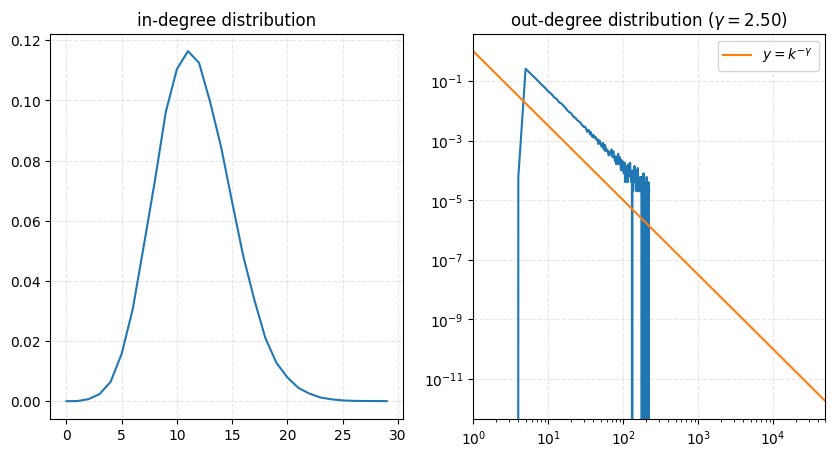

In [43]:
k_val = np.arange(0, G.number_of_nodes())
in_deg = np.array([G.in_degree(u) for u in k_val])
out_deg = np.array([G.out_degree(u) for u in k_val])

in_distribution = np.bincount(in_deg)
in_distribution = in_distribution / np.sum(in_distribution)
out_distribution = np.bincount(out_deg)
out_distribution = out_distribution / np.sum(out_distribution)

y = k_val **(-gamma)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(in_distribution, label="in-degree")
ax[0].set_title("in-degree distribution")
ax[0].grid(True, alpha=0.3, ls="--")

ax[1].plot(out_distribution)
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_title(rf"out-degree distribution ($\gamma={gamma:.2f}$)")
ax[1].plot(k_val, y, label=r"$y=k^{-\gamma}$")
ax[1].set_xlim(1, G.number_of_nodes())
ax[1].grid(True, alpha=0.3, ls="--")
ax[1].legend()
plt.show()